# Customer Churn Prediction using ANN

## Importing nessasary library functions

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# Importing dataset
download_link : https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction

In [ ]:
data = pd.read_csv("/content/(1)Churn_Modelling.csv")

In [ ]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# EDA

conducting the non-graphical EDA on the dataset in order to know it/ get familiar with it.

In [ ]:
data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From above we now know the number of entries in the dataset along with the mean standard deviation, min and max values along with the essential percentiles  telling us meta about each attributes like symmetry of the dataset, spread, number of null values and possible outliers in the data.

## Conducting Graphical EDA

In [ ]:
sns.set_theme()

<ipython-input-10-ef588b861f57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'RdBu', annot =True, fmt = "0.2%")


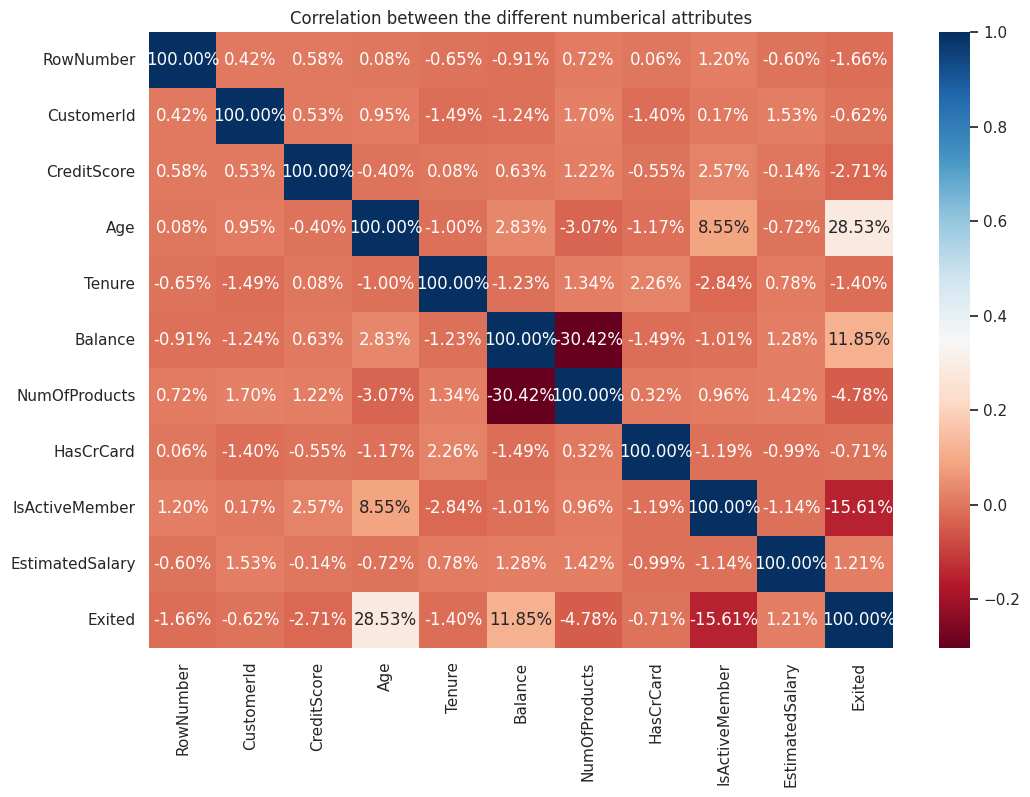

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), cmap = 'RdBu', annot =True, fmt = "0.2%")
plt.title("Correlation between the different numberical attributes");

In [ ]:
# sns.pairplot(data = data, hue = 'Exited')

In [ ]:
x = data.drop(labels = ['RowNumber', 'CustomerId', 'Exited'], axis = 1)

<Axes: xlabel='NumOfProducts', ylabel='count'>

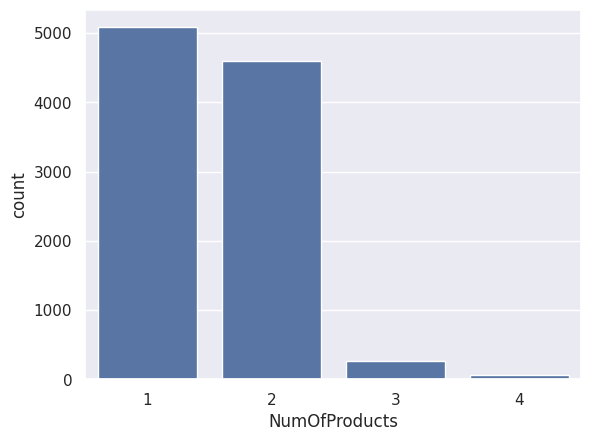

In [ ]:
sns.countplot(data, x = 'NumOfProducts')

<ipython-input-14-969fbd93a0ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x = 'Gender', palette = 'colorblind');


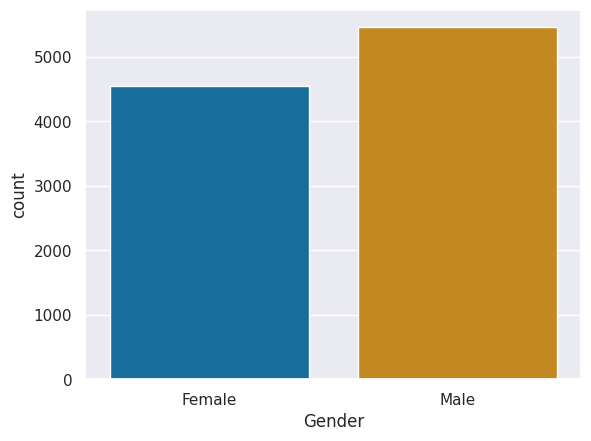

In [ ]:
sns.countplot(data, x = 'Gender', palette = 'colorblind');

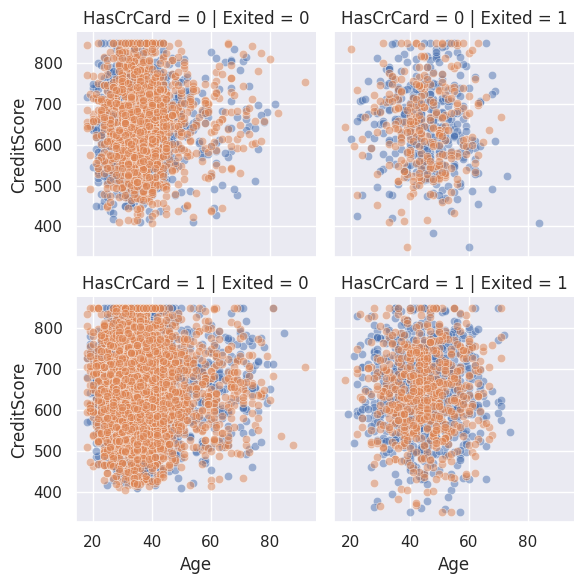

In [ ]:
g = sns.FacetGrid(data, col = 'Exited', row = 'HasCrCard', hue = 'Gender', legend_out = True)
g.map_dataframe(sns.scatterplot, x = 'Age', y = 'CreditScore', alpha = 0.5);

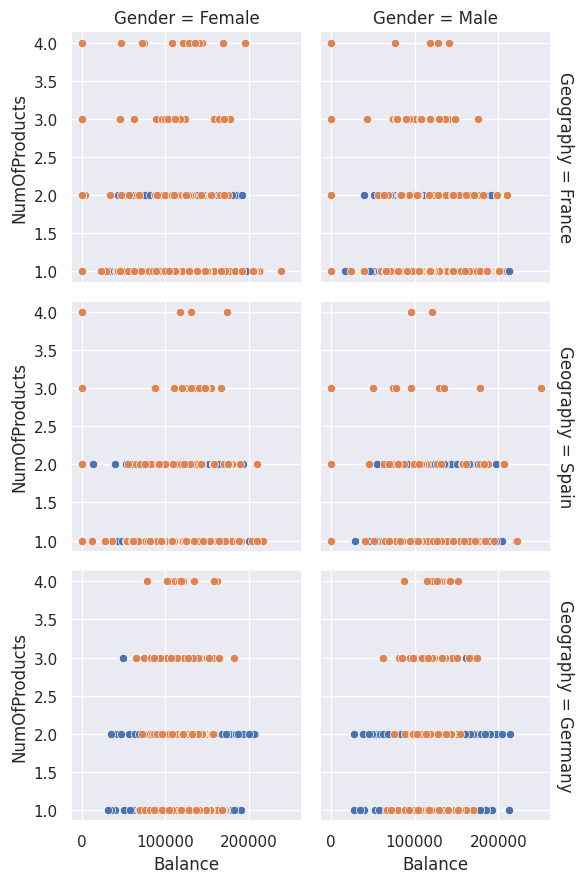

In [ ]:
g = sns.FacetGrid(data, col = 'Gender',row = 'Geography', hue = 'Exited', margin_titles = True , despine = False)
g.map_dataframe(sns.scatterplot, x = 'Balance', y = 'NumOfProducts');

In [ ]:
x = data.drop(labels = ['RowNumber', 'CustomerId', 'Exited'], axis = 1)
y = data.Exited

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [ ]:
ct = make_column_transformer(
    (OneHotEncoder(), [0, 2, 3]),
    (StandardScaler(), [1, 4, 5, 6, 7, 8, 9, 10]),
    remainder = "passthrough"
)
ct.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(), [0, 2, 3]),
                                ('standardscaler', StandardScaler(),
                                 [1, 4, 5, 6, 7, 8, 9, 10])])

The standardization done for feature selection

In [ ]:
clf = Pipeline([
    ('standardization_and_encoding', make_column_transformer(
    (OneHotEncoder(), [0, 2, 3]),
    (StandardScaler(), [1, 4, 5, 6, 7, 8, 9, 10]),
    remainder = "passthrough"
)),
    ('model', DecisionTreeClassifier())
])

In [ ]:
clf.fit(x, y)

Pipeline(steps=[('standardization_and_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), [0, 2, 3]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [1, 4, 5, 6, 7, 8, 9, 10])])),
                ('model', DecisionTreeClassifier())])

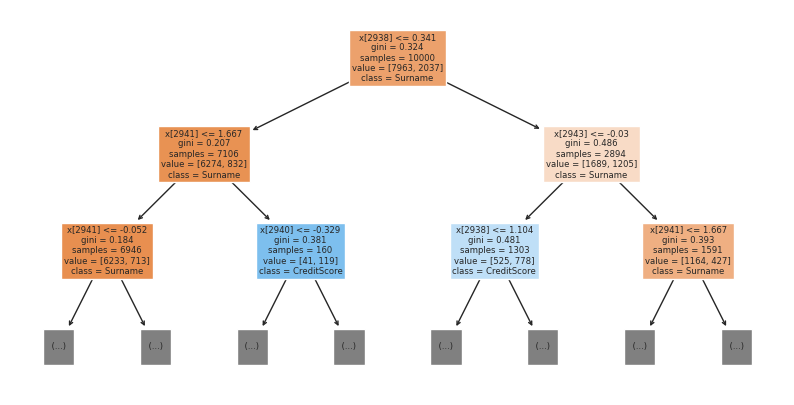

In [ ]:
plt.figure(figsize = (10, 5))
plot_tree(clf.named_steps['model'], class_names = x.columns, filled = True, max_depth = 2);

## Results of the Graphical Analysis
 * The dataset contains no null values.
 * The dataset have 3 object/ string valued attributes.
 * Columns named: Age, IsActiveMember, Balance, NumOfProducts affect the target column i.e. Exited.
 * Columns: Surname and credit score are also the most important features fromthe dataset as seen from the decision tree.
 * The column Age show correlation with the columns IsActiveMember and Balance.
 * Similarly the column IsActiveMember

# Making multiple ANN's with different optimizers

In [ ]:
x.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


(None, None)

In [ ]:
X_resampled, y_resampled = resample(x, y, n_samples=len(y), replace=True)

In [ ]:
y_resampled.shape

(10000,)

In [ ]:
sns.countplot(y)

In [ ]:
ct = make_column_transformer(
    (OrdinalEncoder(), [0]),
    (OneHotEncoder(), [2, 3]),
    (StandardScaler(), [1, 4, 5, 6, 7, 8, 9, 10]),
    remainder = "passthrough"
)
x_trans = ct.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_trans, y, test_size = 0.20)#, random_state = 42)

In [ ]:
X_train

array([[ 2.28700000e+03,  1.00000000e+00,  0.00000000e+00, ...,
         6.46091668e-01, -1.03067011e+00,  2.50825905e-01],
       [ 1.35300000e+03,  0.00000000e+00,  0.00000000e+00, ...,
         6.46091668e-01,  9.70242551e-01,  1.70249464e+00],
       [ 2.11400000e+03,  1.00000000e+00,  0.00000000e+00, ...,
         6.46091668e-01,  9.70242551e-01,  1.46547369e+00],
       ...,
       [ 3.60000000e+02,  1.00000000e+00,  0.00000000e+00, ...,
        -1.54776799e+00,  9.70242551e-01,  4.58102272e-01],
       [ 1.70000000e+02,  1.00000000e+00,  0.00000000e+00, ...,
        -1.54776799e+00, -1.03067011e+00, -5.63808768e-02],
       [ 8.52000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
        -1.54776799e+00,  9.70242551e-01,  1.71427447e+00]])

In [ ]:
data.Surname.unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
# tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(32, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(16, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(8, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_SGD_as_optimizer")
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

Epoch 1/5
250/250 [==============================] - 2s 4ms/step - loss: 274.6322 - accuracy: 0.7897 - val_loss: 0.5015 - val_accuracy: 0.7995
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.5069 - accuracy: 0.7955 - val_loss: 0.5015 - val_accuracy: 0.7995
Epoch 3/5
250/250 [==============================] - 1s 4ms/step - loss: 0.5070 - accuracy: 0.7955 - val_loss: 0.5015 - val_accuracy: 0.7995
Epoch 4/5
250/250 [==============================] - 1s 4ms/step - loss: 0.5070 - accuracy: 0.7955 - val_loss: 0.5015 - val_accuracy: 0.7995
Epoch 5/5
250/250 [==============================] - 1s 5ms/step - loss: 0.5069 - accuracy: 0.7955 - val_loss: 0.5018 - val_accuracy: 0.7995


In [ ]:
model_1.summary()

Model: "DNN_with_SGD_as_optimizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 32)                480       
                                                                 
 hidden_layer_1 (Dense)      (None, 16)                528       
                                                                 
 hidden_layer_2 (Dense)      (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"The loss the model_1: {model_1.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_1: {model_1.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

The loss the model_1: 50.180649757385254
The testing accuracy of the model_1: 79.94999885559082%


In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_Adagrad_as_optimizer")
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adagrad(),
              metrics = ['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

Epoch 1/5
250/250 [==============================] - 4s 12ms/step - loss: 2.1293 - accuracy: 0.7441 - val_loss: 0.5528 - val_accuracy: 0.7925
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.5652 - accuracy: 0.7834 - val_loss: 0.5750 - val_accuracy: 0.7925
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 0.5643 - accuracy: 0.7868 - val_loss: 0.5461 - val_accuracy: 0.7980
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.5619 - accuracy: 0.7874 - val_loss: 0.5628 - val_accuracy: 0.7995
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.5567 - accuracy: 0.7934 - val_loss: 0.5462 - val_accuracy: 0.7995


In [ ]:
model_2.summary()

Model: "DNN_with_Adagrad_as_optimizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 13)                195       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                448       
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                2112      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 2820 (11.02 KB)
Trainable params: 2820 (11.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"The loss the model_2: {model_2.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_2: {model_2.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

The loss the model_2: 54.62309122085571
The testing accuracy of the model_2: 79.94999885559082%


In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_Adadelta_as_optimizer")
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adadelta(name = 'Adadelta'),
              metrics = ['accuracy'])
history_3 = model_3.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

Epoch 1/5
250/250 [==============================] - 2s 6ms/step - loss: 53.6168 - accuracy: 0.2045 - val_loss: 48.6776 - val_accuracy: 0.2005
Epoch 2/5
250/250 [==============================] - 1s 6ms/step - loss: 46.2490 - accuracy: 0.2045 - val_loss: 40.9525 - val_accuracy: 0.2015
Epoch 3/5
250/250 [==============================] - 1s 4ms/step - loss: 37.7612 - accuracy: 0.2045 - val_loss: 32.1982 - val_accuracy: 0.2015
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 28.2471 - accuracy: 0.2046 - val_loss: 22.5699 - val_accuracy: 0.2015
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 18.3665 - accuracy: 0.2046 - val_loss: 12.9851 - val_accuracy: 0.2010


In [ ]:
model_3.summary()

Model: "DNN_with_Adadelta_as_optimizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 13)                195       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                448       
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                2112      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 2820 (11.02 KB)
Trainable params: 2820 (11.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"The loss the model_3: {model_3.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_3: {model_3.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

The loss the model_3: 1298.5113143920898
The testing accuracy of the model_3: 20.100000500679016%


In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_RMSprop_as_optimizer")
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])
history_4 = model_4.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

Epoch 1/5
250/250 [==============================] - 2s 4ms/step - loss: 4.0032 - accuracy: 0.6670 - val_loss: 3.0794 - val_accuracy: 0.8000
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 2.3942 - accuracy: 0.6783 - val_loss: 1.4912 - val_accuracy: 0.8010
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 1.7377 - accuracy: 0.6864 - val_loss: 1.9060 - val_accuracy: 0.8005
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 1.2690 - accuracy: 0.6929 - val_loss: 0.6274 - val_accuracy: 0.8005
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.9716 - accuracy: 0.7189 - val_loss: 1.1347 - val_accuracy: 0.8000


In [ ]:
model_4.summary()

Model: "DNN_with_RMSprop_as_optimizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 13)                195       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                448       
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                2112      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 2820 (11.02 KB)
Trainable params: 2820 (11.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"The loss the model_4: {model_4.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_4: {model_4.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

The loss the model_4: 113.46997022628784
The testing accuracy of the model_4: 80.0000011920929%


In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_AdamW_as_optimizer")
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.AdamW(),
              metrics = ['accuracy'])
history_5 = model_5.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

Epoch 1/5
250/250 [==============================] - 2s 4ms/step - loss: 0.7740 - accuracy: 0.7337 - val_loss: 0.5479 - val_accuracy: 0.7985
Epoch 2/5
250/250 [==============================] - 1s 5ms/step - loss: 0.5739 - accuracy: 0.7724 - val_loss: 0.6281 - val_accuracy: 0.6625
Epoch 3/5
250/250 [==============================] - 1s 5ms/step - loss: 0.6741 - accuracy: 0.7575 - val_loss: 0.7621 - val_accuracy: 0.7995
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.7271 - accuracy: 0.7545 - val_loss: 1.1548 - val_accuracy: 0.8015
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.5830 - accuracy: 0.7721 - val_loss: 0.4895 - val_accuracy: 0.8055


In [ ]:
model_5.summary()

Model: "DNN_with_AdamW_as_optimizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 13)                195       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                448       
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                2112      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 2820 (11.02 KB)
Trainable params: 2820 (11.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"The loss the model_5: {model_5.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_5: {model_5.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

The loss the model_5: 48.95155727863312
The testing accuracy of the model_5: 80.54999709129333%


In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_Adam_as_optimizer")
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history_6 = model_6.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

Epoch 1/5
250/250 [==============================] - 2s 4ms/step - loss: 1.4655 - accuracy: 0.7035 - val_loss: 0.7781 - val_accuracy: 0.7990
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.6849 - accuracy: 0.7533 - val_loss: 0.9211 - val_accuracy: 0.4045
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 0.7353 - accuracy: 0.7460 - val_loss: 0.8845 - val_accuracy: 0.8005
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.7593 - accuracy: 0.7412 - val_loss: 0.4651 - val_accuracy: 0.8175
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.6773 - accuracy: 0.7515 - val_loss: 0.5849 - val_accuracy: 0.8040


In [ ]:
model_6.summary()

Model: "DNN_with_Adam_as_optimizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 13)                195       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                448       
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                2112      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 2820 (11.02 KB)
Trainable params: 2820 (11.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"The loss the model_6: {model_6.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_6: {model_6.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

The loss the model_6: 58.49131941795349
The testing accuracy of the model_6: 80.40000200271606%


## Model evaluation and comparison of different optimizers

In [ ]:
loss = []
loss.append(model_1.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_2.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_3.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_4.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_5.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_6.evaluate(X_test, y_test, verbose = 0)[0])

In [ ]:
loss

[0.5018064975738525,
 0.5462309122085571,
 12.985113143920898,
 1.1346997022628784,
 0.4895155727863312,
 0.5849131941795349]

In [ ]:
accuracy = []
accuracy.append(model_1.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_2.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_3.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_4.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_5.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_6.evaluate(X_test, y_test, verbose = 0)[1]*100)

In [ ]:
accuracy

[79.94999885559082,
 79.94999885559082,
 20.100000500679016,
 80.0000011920929,
 80.54999709129333,
 80.40000200271606]

In [ ]:
y = np.arange(0, 101, 10)

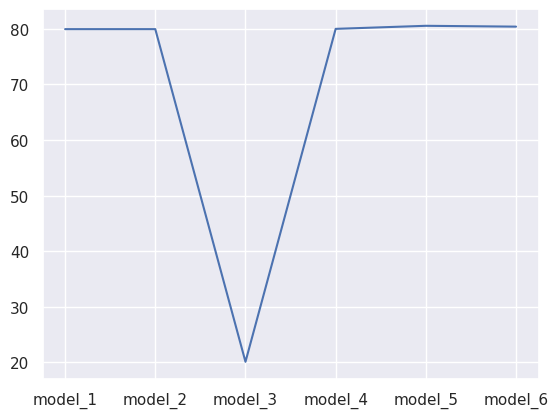

In [ ]:
models = ['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6']
plt.plot(models, accuracy)

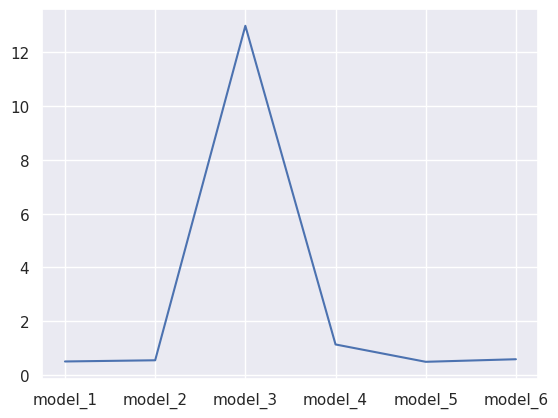

In [ ]:
plt.plot(models, loss)